In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1,70,4.0,130.0,322.0,0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0,67,3.0,115.0,564.0,0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1,57,2.0,124.0,261.0,0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1,64,4.0,128.0,263.0,0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0,74,2.0,120.0,269.0,0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,52,3.0,172.0,199.0,1,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1,44,2.0,120.0,263.0,0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0,56,2.0,140.0,294.0,0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1,57,4.0,140.0,192.0,0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	1
float64		column 4	1
float64		column 5	1
int64		column 6	0
float64		column 7	2
float64		column 8	4
float64		column 9	1
float64		column 10	2
float64		column 11	4
float64		column 12	3
float64		column 13	5


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,270.000000,270.000000,269.000000,269.000000,269.000000,270.000000,268.000000,266.000000,269.000000,268.000000,266.000000,267.000000,265.000000
mean,0.677778,54.433333,3.174721,131.423792,249.401487,0.148148,1.029851,149.522556,0.330855,1.048134,1.582707,0.670412,4.686792
std,0.468195,9.109067,0.951801,17.847163,51.608408,0.355906,0.997677,23.203478,0.471398,1.148993,0.616382,0.943909,1.941379
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.650000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

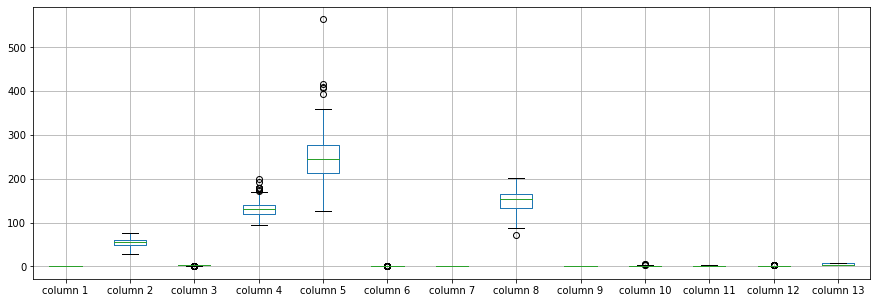

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.677778
column 2      54.433333
column 3       3.174721
column 4     131.423792
column 5     249.401487
column 6       0.148148
column 7       1.029851
column 8     149.522556
column 9       0.330855
column 10      1.048134
column 11      1.582707
column 12      0.670412
column 13      4.686792
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.094401,0.035139,-0.059837,-0.195824,0.042140,0.036659,-0.067736,0.182147,0.096457,0.046260,0.099157,0.387095
column 2,-0.094401,1.000000,0.097845,0.267957,0.218895,0.123458,0.126566,-0.417933,0.101341,0.200653,0.162558,0.347178,0.115790
column 3,0.035139,0.097845,1.000000,-0.039176,0.098940,-0.098860,0.072653,-0.322357,0.353026,0.166030,0.131981,0.227936,0.254575
column 4,-0.059837,0.267957,-0.039176,1.000000,0.166426,0.154286,0.115711,-0.052240,0.091092,0.232189,0.151025,0.068678,0.140142
column 5,-0.195824,0.218895,0.098940,0.166426,1.000000,0.013393,0.155198,-0.015854,0.086986,0.034256,0.003780,0.117175,0.044492
column 6,0.042140,0.123458,-0.098860,0.154286,0.013393,1.000000,0.062012,0.018641,-0.005201,-0.024702,0.049893,0.110916,0.055020
column 7,0.036659,0.126566,0.072653,0.115711,0.155198,0.062012,1.000000,-0.078182,0.087775,0.125406,0.168744,0.120194,-0.002274
column 8,-0.067736,-0.417933,-0.322357,-0.052240,-0.015854,0.018641,-0.078182,1.000000,-0.379898,-0.348554,-0.394296,-0.282582,-0.249640
column 9,0.182147,0.101341,0.353026,0.091092,0.086986,-0.005201,0.087775,-0.379898,1.000000,0.272854,0.258961,0.154505,0.320725
column 10,0.096457,0.200653,0.166030,0.232189,0.034256,-0.024702,0.125406,-0.348554,0.272854,1.000000,0.609688,0.260593,0.316323


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+28,13+28+28,13+28+28+28,13+28+28+28+28,13+28+28+28+28+28,13+28+28+28+28,13+28+28+28,13+28+28,13+28,13], vae_layer = False, seed = 28)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 604.8955116271973
Epoch: 1 , loss: 604.6878089904785
Epoch: 2 , loss: 606.1456985473633
Epoch: 3 , loss: 606.616039276123
Epoch: 4 , loss: 604.240119934082
Epoch: 5 , loss: 605.2093658447266
Epoch: 6 , loss: 605.5748138427734
Epoch: 7 , loss: 604.1342620849609
Epoch: 8 , loss: 603.2903785705566
Epoch: 9 , loss: 602.3332748413086
Epoch: 10 , loss: 605.4643020629883
Epoch: 11 , loss: 605.6294326782227
Epoch: 12 , loss: 604.9292945861816
Epoch: 13 , loss: 605.4941253662109
Epoch: 14 , loss: 604.8558464050293
Epoch: 15 , loss: 604.5854301452637
Epoch: 16 , loss: 606.4998550415039
Epoch: 17 , loss: 605.4979019165039
Epoch: 18 , loss: 605.1929702758789
Epoch: 19 , loss: 606.2019996643066
Epoch: 20 , loss: 604.4514236450195
Epoch: 21 , loss: 606.5170707702637
Epoch: 22 , loss: 603.7089157104492
Epoch: 23 , loss: 607.1987113952637
Epoch: 24 , loss: 603.7594757080078
Epoch: 25 , loss: 605.7858200073242
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(466.4568829044614, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.08614556107258653

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1,70,4.0,130.0,322.0,0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0,67,3.0,115.0,564.0,0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1,57,2.0,124.0,261.0,0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1,64,4.0,128.0,263.0,0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0,74,2.0,120.0,269.0,0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,52,3.0,172.0,199.0,1,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1,44,2.0,120.0,263.0,0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0,56,2.0,140.0,294.0,0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1,57,4.0,140.0,192.0,0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [21]:
imputations[-1].to_excel("Sheart_AG_1(imp).xlsx", index=False, header=False)